<a href="https://colab.research.google.com/github/araga2004/IPL_score_predictor/blob/main/IPL_score_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
import pandas as pd

file_path = '/content/drive/My Drive/ipl.csv'
df = pd.read_csv(file_path)
df.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [6]:
X = df.iloc[: , [7, 8, 9, 10, 11, 12, 13]]
print(X)
y = df['total']
print(y)

       runs  wickets  overs  runs_last_5  wickets_last_5  striker  non-striker
0         1        0    0.1            1               0        0            0
1         1        0    0.2            1               0        0            0
2         2        0    0.2            2               0        0            0
3         2        0    0.3            2               0        0            0
4         2        0    0.4            2               0        0            0
...     ...      ...    ...          ...             ...      ...          ...
76009   121        7   19.2           40               0       40           12
76010   127        7   19.3           46               0       46           12
76011   128        7   19.4           47               0       47           12
76012   129        7   19.5           48               0       47           13
76013   129        8   19.6           47               1       47           13

[76014 rows x 7 columns]
0        222
1        222


In [7]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalised = scaler.fit_transform(X)
print(X_normalised)

[[-1.51341253 -1.19881525 -1.67743362 ... -1.06357976 -1.24316513
  -0.82155958]
 [-1.51341253 -1.19881525 -1.66011025 ... -1.06357976 -1.24316513
  -0.82155958]
 [-1.49293038 -1.19881525 -1.66011025 ... -1.06357976 -1.24316513
  -0.82155958]
 ...
 [ 1.08782017  2.27479695  1.66597678 ... -1.06357976  1.09751663
   0.28999704]
 [ 1.10830231  2.27479695  1.68330015 ... -1.06357976  1.09751663
   0.38262676]
 [ 1.10830231  2.77102727  1.70062352 ... -0.11421502  1.09751663
   0.38262676]]


In [8]:
#Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.2, random_state = 223)



In [9]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept = True)
lr_model.fit(X_train,y_train)

LinearRegression()

In [10]:
predictions = lr_model.predict(X_test)
R_squared = lr_model.score(X_test, y_test)
print(R_squared)


0.5031803473183073


In [29]:
#prediction on a custom input
custom_input = [[85, 3, 10.1, 40, 2, 17, 0]]
final_score = lr_model.predict(scaler.transform(custom_input))
print(final_score)

[165.03326982]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Lasso Regression**

In [3]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()

In [12]:
param_grid = {'alpha' : [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(estimator = lasso_model, param_grid = param_grid, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.3s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.2s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.2s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.2s
[CV] END ..........................................alpha=1.0; total time=   0.2s
[CV] END ........................................

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}, verbose=2)

In [15]:
best_alpha = grid_search.best_params_
print(best_alpha)
best_score = grid_search.best_score_
print(best_score)

{'alpha': 0.1}
0.5078997485495841


In [16]:
best_lasso_model = grid_search.best_estimator_
y_pred = best_lasso_model.predict(X_test)
R_squared = best_lasso_model.score(X_test, y_test)
print(R_squared)

0.5022709124921383


In [20]:
grid_search.cv_results_
results = pd.DataFrame(grid_search.cv_results_)

Plotting the R^2 values v/s the alphas

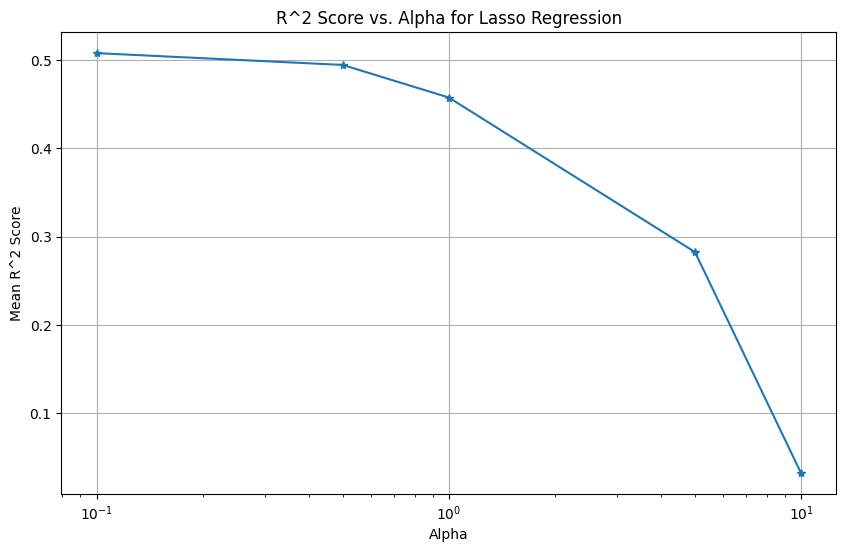

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(param_grid['alpha'], results['mean_test_score'], marker = '*')
plt.xlabel('Alpha')
plt.ylabel('Mean R^2 Score')
plt.title('R^2 Score vs. Alpha for Lasso Regression')
plt.xscale('log')
plt.grid(True)
plt.show()

In [26]:
#prediction on a custom input
custom_input = [[85, 2, 13.1, 40, 2, 17, 0]]
final_score = best_lasso_model.predict(scaler.transform(custom_input))
print(final_score)

[153.69237503]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
loss = model.evaluate(X_test, y_test)
print(loss)

Epoch 1/100
1521/1521 [==============================] - 4s 2ms/step - loss: 3538.2424 - val_loss: 483.5079
Epoch 2/100
1521/1521 [==============================] - 6s 4ms/step - loss: 447.4768 - val_loss: 421.1333
Epoch 3/100
1521/1521 [==============================] - 5s 3ms/step - loss: 421.6807 - val_loss: 426.2072
Epoch 4/100
1521/1521 [==============================] - 3s 2ms/step - loss: 417.4454 - val_loss: 410.4322
Epoch 5/100
1521/1521 [==============================] - 6s 4ms/step - loss: 413.1832 - val_loss: 414.0012
Epoch 6/100
1521/1521 [==============================] - 10s 6ms/step - loss: 409.8472 - val_loss: 406.5195
Epoch 7/100
1521/1521 [==============================] - 10s 7ms/step - loss: 407.6122 - val_loss: 403.2937
Epoch 8/100
1521/1521 [==============================] - 4s 2ms/step - loss: 407.2274 - val_loss: 407.2090
Epoch 9/100
1521/1521 [==============================] - 7s 5ms/step - loss: 406.3985 - val_loss: 402.4678
Epoch 10/100
1521/1521 [==========

KeyboardInterrupt: 

In [ ]:
custom_input = [[130, 0, 7.0, 90, 0, 70, 60]]
final_score = model.predict(scaler.transform(custom_input))
print(final_score)
final_score2 = lr_model.predict(scaler.transform(custom_input))
print(final_score2)

1/1 [==============================] - 0s 30ms/step
[[0.46663663]]
[243.15816485]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Random Forest Regressor**

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [13]:
forest = RandomForestRegressor(n_estimators = 100, bootstrap = True, random_state = 21)
forest.fit(X_train, y_train)
rf_predictions = forest.predict(X_test)
r2 = r2_score(y_test, rf_predictions)
mae = mean_absolute_error(y_test, rf_predictions)
rmse = mean_squared_error(y_test, rf_predictions, squared = False)
print("r2 score = ", r2)
print("Mean Squared Error = ", rmse)
print("Mean Absolute Error = ", mae)

r2 score =  0.691275617075491
Mean Squared Error =  16.21746179263246
Mean Absolute Error =  10.243464347936666


# **GridSearchCV**

In [1]:
n_estimators = [20, 60, 100, 120]
max_depth = [2, 5, None]
max_samples = [0.25, 0.5, 0.75, 1.0]
max_features = [0.2, 0.6, 1.0]


In [3]:
param_grid = {'n_estimators' : n_estimators, 'max_features' : max_features,
              'max_depth' : max_depth, 'max_samples' : max_samples}

In [15]:
from sklearn.model_selection import GridSearchCV
random_forest_grid = GridSearchCV(estimator = forest, param_grid = param_grid,
                                  verbose = 2)
random_forest_grid.fit(X_train, y_train)



Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=2, max_features=0.2, max_samples=0.25, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.25, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.25, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.25, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.25, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.25, n_estimators=60; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.25, n_estimators=60; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.25, n_estimators=60; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.25, n_estimators=60; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.25, n_estimators=60; total time=   0.

GridSearchCV(estimator=RandomForestRegressor(random_state=21),
             param_grid={'max_depth': [2, 5, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.25, 0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [1]:
param_grid.best_params_

NameError: name 'param_grid' is not defined